In [17]:
import pandas as pd
from functions_2 import *
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_demo = pd.read_csv('df_final_demo.csv')
df_web_pt1 = pd.read_csv('df_final_web_data_pt_1.csv')
df_web_pt2 = pd.read_csv('df_final_web_data_pt_2.csv')
df_experiment = pd.read_csv('df_final_experiment_clients.csv')

# Mostrar las primeras filas de cada dataset
display(df_demo.head())
display(df_web_pt1.head())
display(df_web_pt2.head())
display(df_experiment.head())

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [18]:
#Normalización de nombres de columnas
df_experiment = normalizar_nombres_columnas(df_experiment)
display(df_experiment)

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [19]:
# Resumen estadístico
print(df_demo.describe())
print(df_web_pt1.describe())
print(df_web_pt2.describe())
print(df_experiment.describe())

          client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  7.060900e+04    70595.000000      70595.000000  70594.000000   
mean   5.004992e+06       12.052950        150.659367     46.442240   
std    2.877278e+06        6.871819         82.089854     15.591273   
min    1.690000e+02        2.000000         33.000000     13.500000   
25%    2.519329e+06        6.000000         82.000000     32.500000   
50%    5.016978e+06       11.000000        136.000000     47.000000   
75%    7.483085e+06       16.000000        192.000000     59.000000   
max    9.999839e+06       62.000000        749.000000     96.000000   

          num_accts           bal  calls_6_mnth  logons_6_mnth  
count  70595.000000  7.059500e+04  70595.000000   70595.000000  
mean       2.255528  1.474452e+05      3.382478       5.566740  
std        0.534997  3.015087e+05      2.236580       2.353286  
min        1.000000  1.378942e+04      0.000000       1.000000  
25%        2.000000  3.734683e+04  

In [20]:
# Tipos de datos y valores nulos
print(df_demo.info())
print(df_web_pt1.info())
print(df_web_pt2.info())
print(df_experiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 

In [21]:
# Duplicados
print(f"Duplicados en df_demo: {df_demo.duplicated().sum()}")
print(f"Duplicados en df_web_pt1: {df_web_pt1.duplicated().sum()}")
print(f"Duplicados en df_web_pt2: {df_web_pt2.duplicated().sum()}")
print(f"Duplicados en df_experiment: {df_experiment.duplicated().sum()}")

# Valores nulos
print(df_demo.isnull().sum())
print(df_web_pt1.isnull().sum())
print(df_web_pt2.isnull().sum())
print(df_experiment.isnull().sum())


Duplicados en df_demo: 0
Duplicados en df_web_pt1: 2095
Duplicados en df_web_pt2: 8669
Duplicados en df_experiment: 0
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id        0
variation    20109
dtype: int64


In [23]:
#Unión de los Conjuntos de Datos Web
df_web_combined = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)
display(df_web_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


None

In [24]:
# 7. Limpieza de Datos
# Eliminar duplicados
df_demo = df_demo.drop_duplicates()
df_web_combined = df_web_combined.drop_duplicates()
df_experiment = df_experiment.drop_duplicates()

# Manejo de valores nulos (ejemplo: eliminar filas con muchos nulos)
df_demo = df_demo.dropna(thresh=int(0.7 * len(df_demo.columns)))
df_web_combined = df_web_combined.dropna(thresh=int(0.7 * len(df_web_combined.columns)))
df_experiment = df_experiment.dropna(thresh=int(0.7 * len(df_experiment.columns)))

In [25]:
df_web_combined['client_id'].duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
755400     True
755401     True
755402     True
755403     True
755404    False
Name: client_id, Length: 744641, dtype: bool

In [26]:
df_demo.shape


(70595, 9)

In [27]:
#Eliminar filas con valores nulos, si el impacto es bajo:
df_demo = df_demo.dropna()
#Para valores numéricos (clnt_age, bal, etc.), puedes usar la media, mediana o un valor representativo:
# Para la columna 'clnt_age'
df_demo['clnt_age'] = df_demo['clnt_age'].fillna(df_demo['clnt_age'].median())

# Para la columna 'bal'
df_demo['bal'] = df_demo['bal'].fillna(df_demo['bal'].mean())

# Para la columna 'gendr' variable categórica
df_demo['gendr'] = df_demo['gendr'].fillna(df_demo['gendr'].mode()[0])

display(df_demo)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [28]:
df_demo.shape

(70594, 9)

In [29]:
# Verificar si aún quedan valores nulos
print(df_demo.isnull().sum())

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [30]:
# En df_experiment:
# La columna variation tiene 20,109 valores nulos. Esto es un porcentaje considerable de datos, por lo que podemos explorar:
# Eliminar filas donde variation sea nulo (si es un subconjunto del que no se puede obtener información útil):
df_experiment = df_experiment.dropna(subset=['variation'])
print(df_experiment.isnull().sum())

client_id    0
variation    0
dtype: int64


1. Distribución de la Edad de los Clientes

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


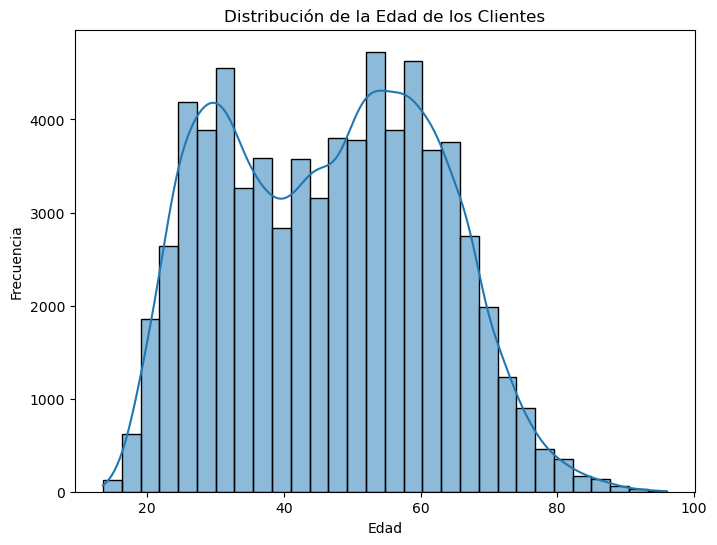

In [31]:
# Distribución de la edad de los clientes
plt.figure(figsize=(8, 6))
sns.histplot(df_demo['clnt_age'], kde=True, bins=30)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


¿Quiénes son los principales clientes que utilizan este proceso en línea?
33.5 y 59.5 mayores, moda = 58.5 años media= 47.32
¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?
son más mayores, de media 150 meses, clientes antiguos ya que


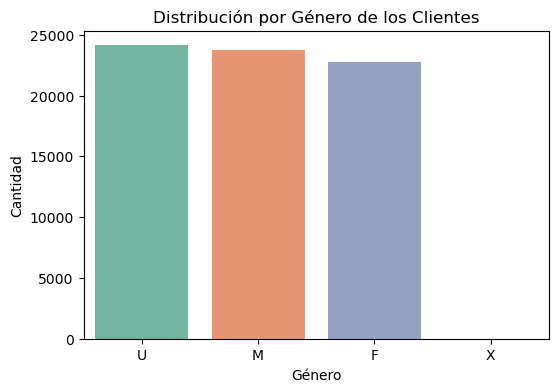

In [32]:
# Distribución por género
plt.figure(figsize=(6, 4))
sns.countplot(x='gendr', data=df_demo, palette='Set2')
plt.title('Distribución por Género de los Clientes')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()


3. Distribución del Número de Cuentas
Analicemos la cantidad de cuentas que tienen los clientes:

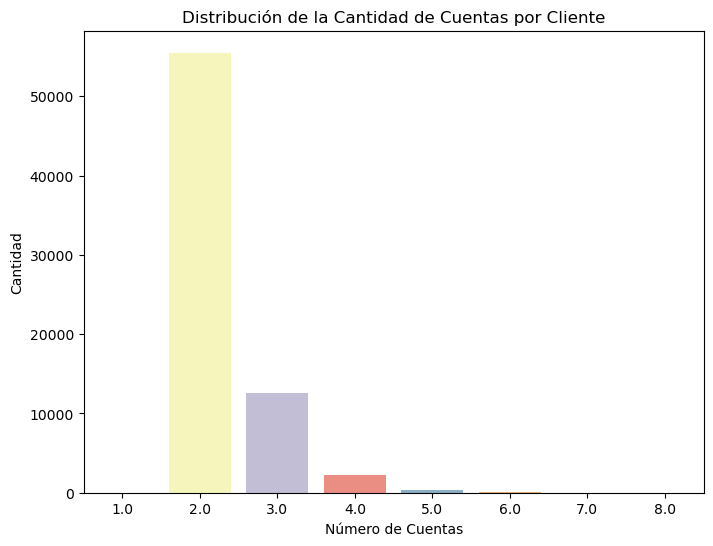

In [33]:
# Distribución del número de cuentas
plt.figure(figsize=(8, 6))
sns.countplot(x='num_accts', data=df_demo, palette='Set3')
plt.title('Distribución de la Cantidad de Cuentas por Cliente')
plt.xlabel('Número de Cuentas')
plt.ylabel('Cantidad')
plt.show()



4. Distribución del Saldo

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


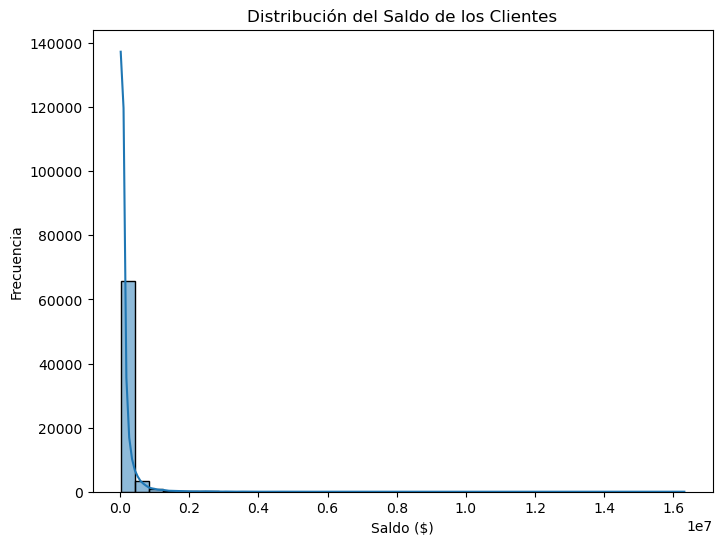

In [34]:
# Distribución del saldo de los clientes
plt.figure(figsize=(8, 6))
sns.histplot(df_demo['bal'], kde=True, bins=40)
plt.title('Distribución del Saldo de los Clientes')
plt.xlabel('Saldo ($)')
plt.ylabel('Frecuencia')
plt.show()


5. Llamadas y Sesiones de Ingreso

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


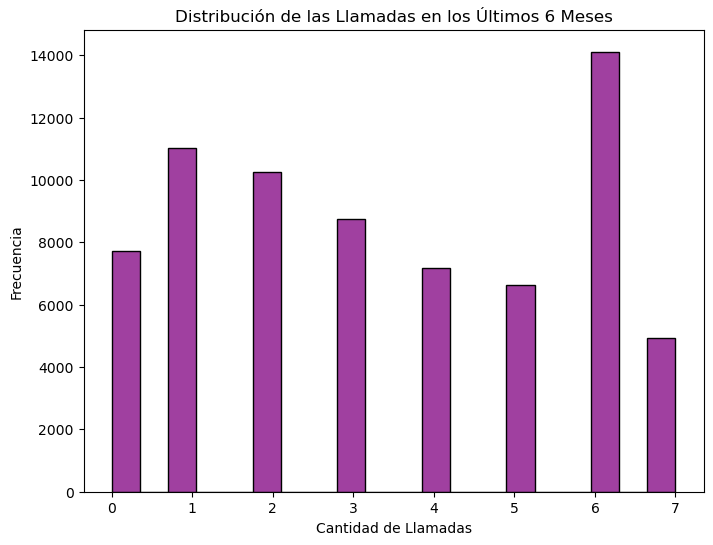

c:\Users\danny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


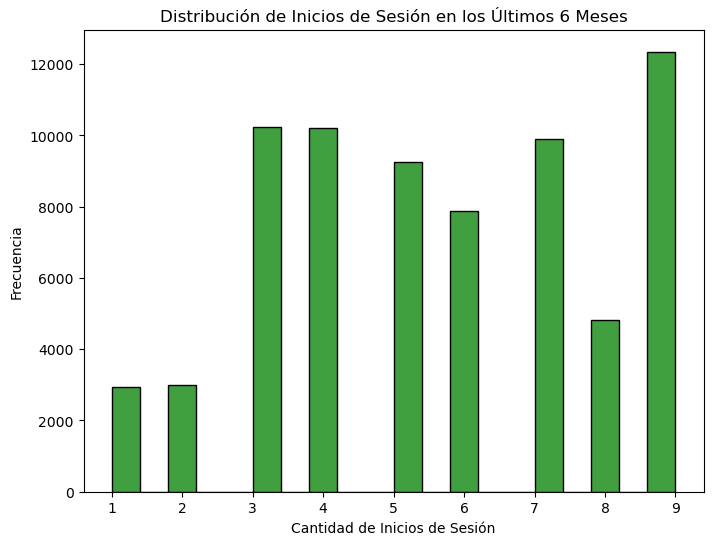

In [35]:
# Distribución de las llamadas en los últimos 6 meses
plt.figure(figsize=(8, 6))
sns.histplot(df_demo['calls_6_mnth'], kde=False, bins=20, color='purple')
plt.title('Distribución de las Llamadas en los Últimos 6 Meses')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las veces que los clientes iniciaron sesión en los últimos 6 meses
plt.figure(figsize=(8, 6))
sns.histplot(df_demo['logons_6_mnth'], kde=False, bins=20, color='green')
plt.title('Distribución de Inicios de Sesión en los Últimos 6 Meses')
plt.xlabel('Cantidad de Inicios de Sesión')
plt.ylabel('Frecuencia')
plt.show()


6. Análisis de la Participación en el Experimento

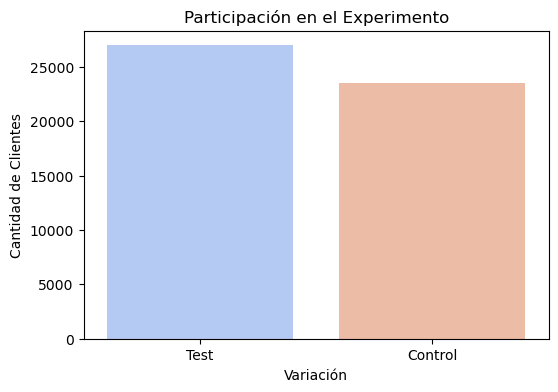

In [37]:
# Participación en el experimento
plt.figure(figsize=(6, 4))
sns.countplot(x='variation', data=df_experiment, palette='coolwarm')
plt.title('Participación en el Experimento')
plt.xlabel('Variación')
plt.ylabel('Cantidad de Clientes')
plt.show()


7. Correlaciones
Podemos revisar la correlación entre las variables numéricas para ver si hay alguna relación interesante entre la edad, el saldo, las llamadas, y los logins:

In [38]:
# Convertir todas las columnas numéricas que puedan tener valores no válidos a NaN
columns_to_fix = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

for col in columns_to_fix:
    df_demo[col] = pd.to_numeric(df_demo[col], errors='coerce')


In [39]:
# Convertir todas las columnas numéricas que puedan tener valores no válidos a NaN
columns_to_fix = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

for col in columns_to_fix:
    df_demo[col] = pd.to_numeric(df_demo[col], errors='coerce')

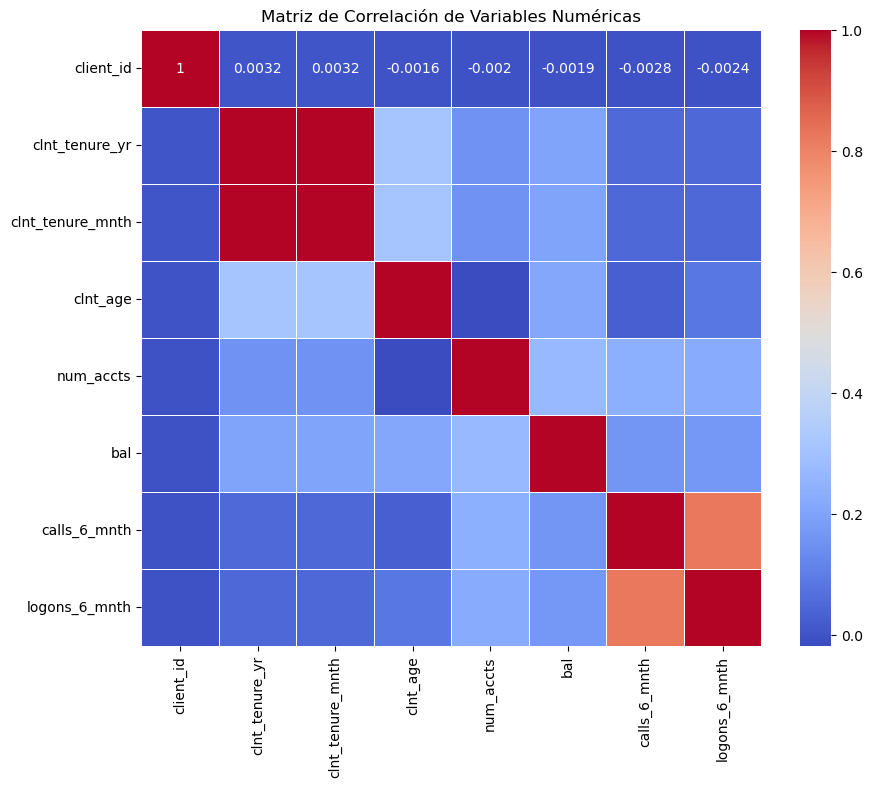

In [40]:
# Seleccionar solo columnas numéricas
df_demo_numeric = df_demo.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_demo_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


8. Exploración del Comportamiento Web

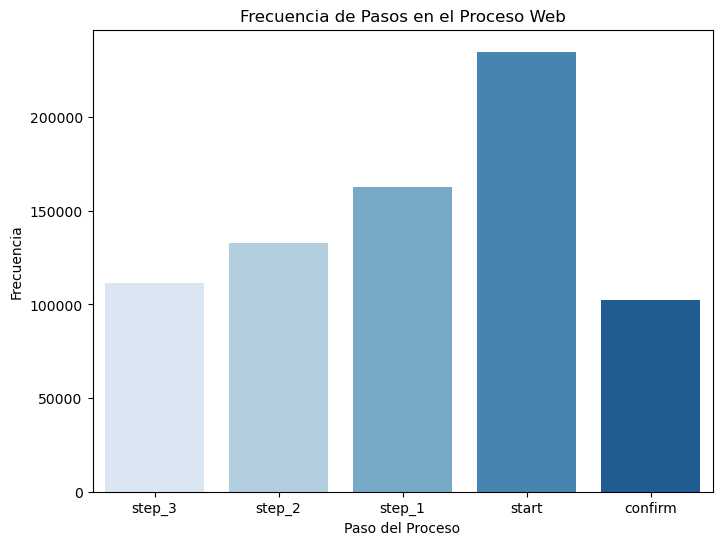

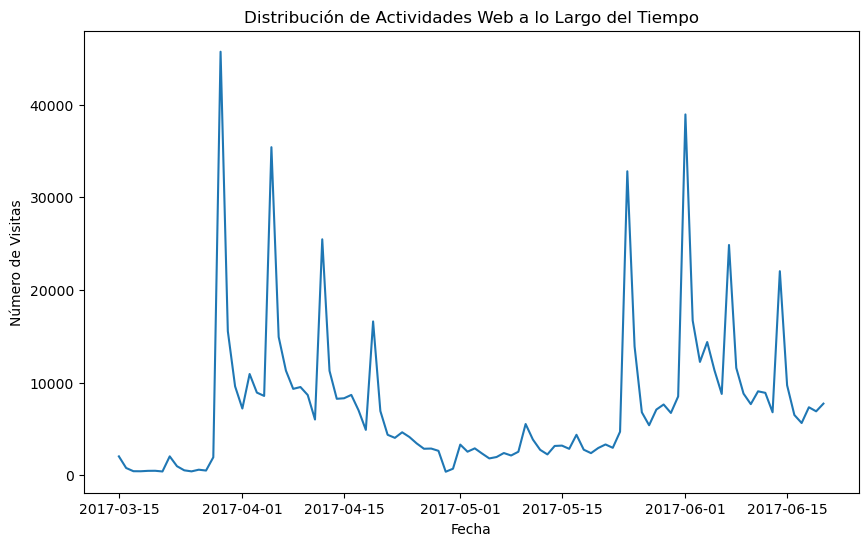

In [41]:
# Conteo de pasos en el proceso digital
plt.figure(figsize=(8, 6))
sns.countplot(x='process_step', data=df_web_combined, palette='Blues')
plt.title('Frecuencia de Pasos en el Proceso Web')
plt.xlabel('Paso del Proceso')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de las visitas en el tiempo
df_web_combined['date_time'] = pd.to_datetime(df_web_combined['date_time'])  # Convertir a formato datetime
plt.figure(figsize=(10, 6))
df_web_combined['date_time'].dt.date.value_counts().sort_index().plot()
plt.title('Distribución de Actividades Web a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Visitas')
plt.show()
